In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['image.cmap']='gray'
plt.ion()

# Detecting Faces

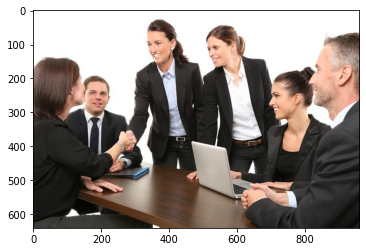

In [3]:
img=cv.imread('../images/people.jpg')
plt.imshow(img[:,:,::-1])

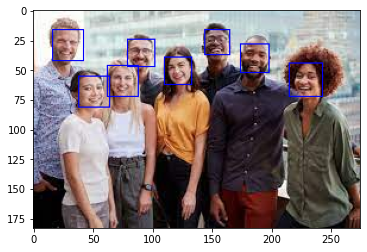

In [4]:
def detectFace(img,scaleFactor=1.1,minNeighbors=4,thickness=1):
    if len(img.shape)==3:
        gray_img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    else:
        gray_img=img
    #Load the Haar Cascade:
    #face_cascade=cv.CascadeClassifier(cv.data.haarcascades+'haarcascade_frontalface_default.xml')
    face_cascade=cv.CascadeClassifier(cv.data.haarcascades+'haarcascade_frontalface_alt2.xml')
   
    #Perform multi-scale face detection using the detectMultiScale function:
    detected_faces=face_cascade.detectMultiScale(gray_img,scaleFactor,minNeighbors)
    # detected_faces->is a list of bounding boxes
    for x,y,w,h in detected_faces:
        img=cv.rectangle(img,(x,y),(x+w,y+h),(250,0,0),thickness)
    return plt.imshow(img[:,:,::-1])
img=cv.imread('../images/peoples1.jpg')
detectFace(img,scaleFactor=1.1,minNeighbors=1)

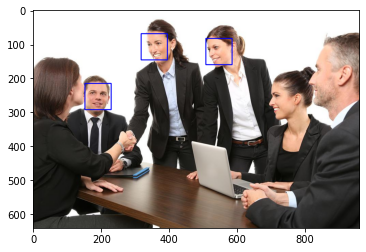

In [5]:
img=cv.imread('../images/people.jpg')
detectFace(img,scaleFactor=1.4,minNeighbors=1,thickness=2)

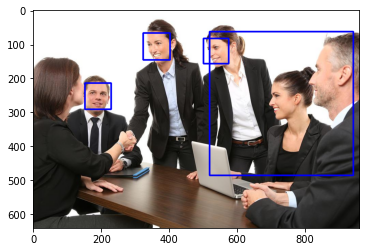

In [6]:
img=cv.imread('../images/people.jpg')
detectFace(img,scaleFactor=1.1,minNeighbors=1,thickness=3)

In [7]:
bayern='../imaged/bayern.mp4'
#camera=cv2.VideoCapture(0)
cap=cv.VideoCapture(bayern)
#cap=cv.VideoCapture()
face_cascade=cv.CascadeClassifier(cv.data.haarcascades+'haarcascade_frontalface_default.xml')
while True:
    ret,frame=cap.read()
    gray_img=cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
    detected_faces=face_cascade.detectMultiScale(gray_img,1.1,1)
    for rect in detected_faces:
        cv.rectangle(frame,rect,(250,0,0),2)
    cv.imshow('vi',frame)
    key=cv.waitKey(27)
    if key==ord('Q') or key==ord('q') or key==27:
        break

cap.release()
cv.destroyAllWindows()

# Detecting Eyes

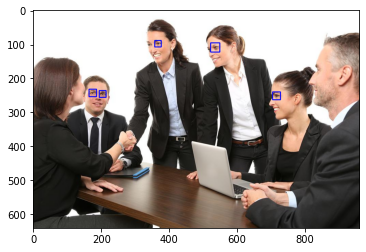

In [8]:
def detectEyes(img,scaleFactor=1.1,minNeighbors=4,thinkness=2):
    if len(img.shape)==3:
        gray_img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    else:
        gray_img=img
    #Load the Haar Cascade:
    #haarCascade=cv.CascadeClassifier(cv.data.haarcascades+'haarcascade_frontalface_default.xml')
    eye_cascade=cv.CascadeClassifier(cv.data.haarcascades+'haarcascade_eye.xml')
   
    #Perform multi-scale face detection using the detectMultiScale function:
    detected_eyes=eye_cascade.detectMultiScale(gray_img,scaleFactor,minNeighbors)
    # detected_faces->is a list of bounding boxes
    for rect in detected_eyes:
        img=cv.rectangle(img,rect,(250,0,0),thinkness)
    return plt.imshow(img[:,:,::-1])
img=cv.imread('../images/people.jpg')
detectEyes(img,scaleFactor=1.4,minNeighbors=1)

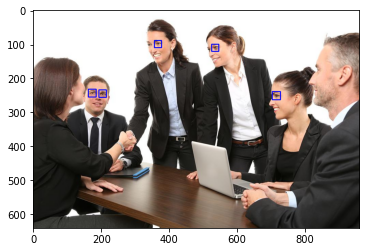

In [9]:
img=cv.imread('../images/people.jpg')
detectEyes(img,scaleFactor=1.1,minNeighbors=3,thinkness=2)

# Eye Detection Using Multiple Cascades

In [10]:
img=cv.imread('../images/people.jpg')
gray_img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
face_cascade=cv.CascadeClassifier(cv.data.haarcascades+'haarcascade_frontalface_default.xml')
eye_cascade=cv.CascadeClassifier(cv.data.haarcascades+'haarcascade_eye.xml')
scaleFactor=1.1
minNeighbors=3
thinkness=1
detected_faces=face_cascade.detectMultiScale(gray_img,scaleFactor,minNeighbors)
for x,y,w,h in detected_faces:     
    img=cv.rectangle(img,(x,y),(x+w,y+h),(250,250,0),thinkness)
    roi_color=img[y:y+h,x:x+w]
    roi_gray=gray_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray,scaleFactor,minNeighbors)
    for rect in eyes:
        cv.rectangle(roi_color,rect,(250,0,0),thinkness)
cv.imshow('im',img)
cv.waitKey(0)
cv.destroyAllWindows()